# Welcome to chessGPT

In [1]:
import chess
import chess.pgn as pgn
import itertools
import numpy as np

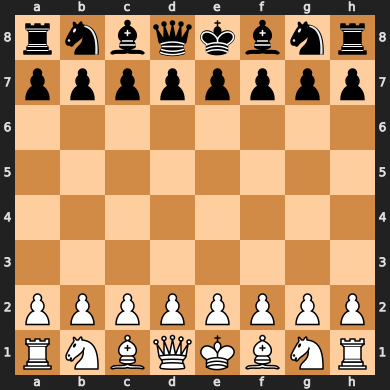

In [2]:
board = chess.Board()
board

## Board encoding

We encode the board in such a way that we garantee the output vector will have a constant length 

In [3]:
def get_pieces(board):
    """We will keep the same encoding as in the FEN notation.
    But we will encode empty squares with a # character.
    """
    fen = board.fen()
    pieces = fen.split()[0]
    for piece in pieces:
        if piece.isdecimal():
            pieces = pieces.replace(piece, '#' * int(piece))
    return pieces


def get_turn(board):
    """We will choose an encoding that has no intersection with the pieces encoding.
    0: black
    1: white
    """
    return "0" if board.turn == chess.BLACK else "1"


def get_castling_rights(board):
    """We will choose an encoding that has no intersection with the pieces encoding.
    u: no castling rights for black
    U: no castling rights for white
    v: queenside castling rights for black
    V: queenside castling rights for white
    w: kingside castling rights for black
    W: kingside castling rights for white
    x: both castling rights for black
    X: both castling rights for white
    """

    castling_rights = ["u", "U"]

    if board.has_queenside_castling_rights(chess.BLACK) and board.has_kingside_castling_rights(chess.BLACK):
        castling_rights[0] = "x"
    elif board.has_queenside_castling_rights(chess.BLACK):
        castling_rights[0] = "v"
    elif board.has_kingside_castling_rights(chess.BLACK):
        castling_rights[0] = "w"
    
    if board.has_queenside_castling_rights(chess.WHITE) and board.has_kingside_castling_rights(chess.WHITE):
        castling_rights[1] = "X"
    elif board.has_queenside_castling_rights(chess.WHITE):
        castling_rights[1] = "V"
    elif board.has_kingside_castling_rights(chess.WHITE):
        castling_rights[1] = "W"

    return "".join(castling_rights)


def transform(board):
    pieces = get_pieces(board)
    turn = get_turn(board)
    castling = get_castling_rights(board)
    return pieces + " " + turn + " " + castling

In [4]:
board_vocab = [ ' ', '/', '0', '1', 'u', 'U', 'v', 'V', 'w', 'W', 'x', 'X', '#', 'K', 'Q', 'R', 'B', 'N', 'P', 'k', 'q', 'r', 'b', 'n', 'p']
fen = transform(board)
print(board)
print(fen)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
rnbqkbnr/pppppppp/########/########/########/########/PPPPPPPP/RNBQKBNR 1 xX


In [5]:
board_stoi = {ch: i for i, ch in enumerate(board_vocab)}
board_itos = {i: ch for i, ch in enumerate(board_vocab)}
board_encode = lambda x: [board_stoi[ch] for ch in x]
board_decode = lambda x: ''.join(board_itos[ch] for ch in x)

print(board_encode(fen))
print(board_decode(board_encode(fen)))

[21, 23, 22, 20, 19, 22, 23, 21, 1, 24, 24, 24, 24, 24, 24, 24, 24, 1, 12, 12, 12, 12, 12, 12, 12, 12, 1, 12, 12, 12, 12, 12, 12, 12, 12, 1, 12, 12, 12, 12, 12, 12, 12, 12, 1, 12, 12, 12, 12, 12, 12, 12, 12, 1, 18, 18, 18, 18, 18, 18, 18, 18, 1, 15, 17, 16, 14, 13, 16, 17, 15, 0, 3, 0, 10, 11]
rnbqkbnr/pppppppp/########/########/########/########/PPPPPPPP/RNBQKBNR 1 xX


## Read PGN game

In [6]:
games = open("../data/master_games.pgn")
first_game = pgn.read_game(games)

In [7]:
print(type(first_game.mainline_moves()))

<class 'chess.pgn.Mainline'>


In [8]:
g = game_iter.next

NameError: name 'game_iter' is not defined

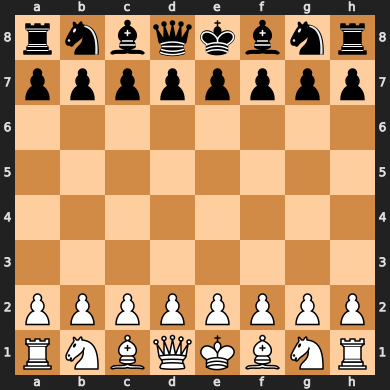

In [ ]:
board = first_game.board()
board

In [9]:
for move in board.legal_moves:
    new_board = board.copy()
    new_board.push(move)
    print(move, transform(new_board))

g1h3 rnbqkbnr/pppppppp/########/########/########/#######N/PPPPPPPP/RNBQKB#R 0 xX
g1f3 rnbqkbnr/pppppppp/########/########/########/#####N##/PPPPPPPP/RNBQKB#R 0 xX
b1c3 rnbqkbnr/pppppppp/########/########/########/##N#####/PPPPPPPP/R#BQKBNR 0 xX
b1a3 rnbqkbnr/pppppppp/########/########/########/N#######/PPPPPPPP/R#BQKBNR 0 xX
h2h3 rnbqkbnr/pppppppp/########/########/########/#######P/PPPPPPP#/RNBQKBNR 0 xX
g2g3 rnbqkbnr/pppppppp/########/########/########/######P#/PPPPPP#P/RNBQKBNR 0 xX
f2f3 rnbqkbnr/pppppppp/########/########/########/#####P##/PPPPP#PP/RNBQKBNR 0 xX
e2e3 rnbqkbnr/pppppppp/########/########/########/####P###/PPPP#PPP/RNBQKBNR 0 xX
d2d3 rnbqkbnr/pppppppp/########/########/########/###P####/PPP#PPPP/RNBQKBNR 0 xX
c2c3 rnbqkbnr/pppppppp/########/########/########/##P#####/PP#PPPPP/RNBQKBNR 0 xX
b2b3 rnbqkbnr/pppppppp/########/########/########/#P######/P#PPPPPP/RNBQKBNR 0 xX
a2a3 rnbqkbnr/pppppppp/########/########/########/P#######/#PPPPPPP/RNBQKBNR 0 xX
h2h4 rnbqkbnr/pp

In [10]:
board.has_castling_rights(0) 

True

In [11]:
moves = list(first_game.mainline_moves())

d2d4


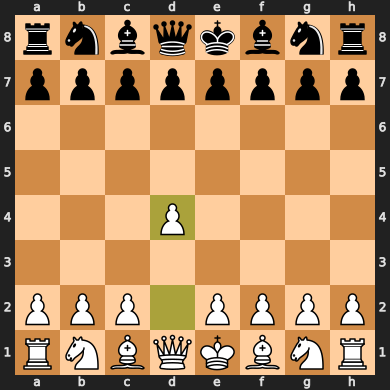

In [12]:
first_move = moves[0]
print(first_move)
board.push(first_move)
board

g8f6


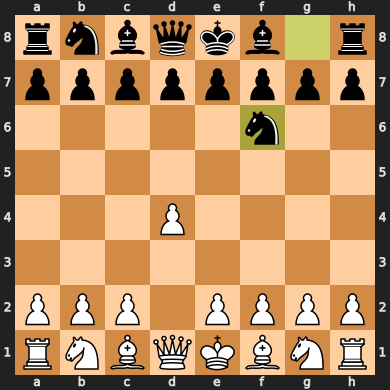

In [13]:
second_move = moves[1]
print(second_move)
board.push(second_move)
board

## Move encoding

In [14]:
# we could reduce the vocab size by only considering the queen and knight moves
# for each square in the board
moves_vocab = [a + b for a, b in itertools.product(chess.SQUARE_NAMES, chess.SQUARE_NAMES) if a != b]

# add promotion moves
for move in moves_vocab:
    if move.endswith(("1", "8")):
        moves_vocab.append(move + "q")
        moves_vocab.append(move + "r")
        moves_vocab.append(move + "b")
        moves_vocab.append(move + "n")

moves_stoi = {move: i for i, move in enumerate(moves_vocab)}
moves_itos = {i: move for i, move in enumerate(moves_vocab)}
print(len(moves_vocab))

8064


In [15]:
move = "e2e4"

moves_encode = lambda x: moves_stoi[x]
moves_decode = lambda x: moves_itos[x]

print(moves_encode(move))
print(moves_decode(moves_encode(move)))

783
e2e4


## Build dataset

In [16]:
def build_dataset(pgn_file, player=None):
    boards = []
    moves = []
    with open(pgn_file) as games:
        while True:
            game = pgn.read_game(games)
            if game is None:
                break
            board = game.board()
            player = chess.WHITE if game.headers["White"] == player else chess.BLACK
            fen = transform(board)
            for move in game.mainline_moves():
                if board.turn == player:
                    boards.append(board_encode(fen))
                    moves.append(moves_encode(move.uci()))
                board.push(move)
    return np.array(boards), np.array(moves)

In [17]:
# Our goal is to produce Magnus Carlsen like games, so we will only include his moves in our data
boards, moves = build_dataset("../data/master_games.pgn", player="Carlsen, Magnus")
print(boards.shape)
print(moves.shape)

(1108, 76)
(1108,)


In [18]:
import torch
boards = torch.from_numpy(boards).long()
moves = torch.from_numpy(moves).long()

In [19]:
boards[0], moves[0]

(tensor([21, 23, 22, 20, 19, 22, 23, 21,  1, 24, 24, 24, 24, 24, 24, 24, 24,  1,
         12, 12, 12, 12, 12, 12, 12, 12,  1, 12, 12, 12, 12, 12, 12, 12, 12,  1,
         12, 12, 12, 12, 12, 12, 12, 12,  1, 12, 12, 12, 12, 12, 12, 12, 12,  1,
         18, 18, 18, 18, 18, 18, 18, 18,  1, 15, 17, 16, 14, 13, 16, 17, 15,  0,
          3,  0, 10, 11]),
 tensor(719))

In [20]:
# train test split
n = int(0.8 * len(boards))
train_boards, train_moves = boards[:n], moves[:n]
val_boards, val_moves = boards[n:], moves[n:]

In [21]:
# one board is always encoded with 76 characters
torch.manual_seed(666)
batch_size = 4


def get_batch(split):
    boards = train_boards if split == "train" else val_boards
    moves = train_moves if split == "train" else val_moves
    i = torch.randint(0, len(boards), (batch_size,))
    x = boards[i]
    y = moves[i]
    return x, y

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy

In [23]:
# https://towardsdatascience.com/build-your-own-transformer-from-scratch-using-pytorch-84c850470dcb

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        output = torch.matmul(attn_probs, V)
        return output
        
    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        output = self.W_o(self.combine_heads(attn_output))
        return output



In [24]:
class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

In [25]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()
        
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [26]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

In [27]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x

In [28]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        
        self.dropout = nn.Dropout(dropout)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt, causal=False):
        src_mask, tgt_mask = self.generate_mask(src, tgt) if causal else None, None
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output

In [48]:
from torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
import random


class PGNDataset(Dataset):

    def __init__(self, pgn_file, player_name=None):
        super().__init__()
        self.pgn_file = pgn_file
        self.player_name = player_name
        self.data = PGNDataset.build_dataset(pgn_file, player_name)

    @staticmethod
    def get_player_by_name(game, player_name):
        if player_name is None:
            return random.choice([chess.WHITE, chess.BLACK])
        return chess.WHITE if game.headers["White"] == player_name else chess.BLACK
    
    @staticmethod
    def extract_game(game, player_name):
        src_data = []
        tgt_data = []
        board = game.board()
        player = PGNDataset.get_player_by_name(game, player_name)
        for i, move in enumerate(game.mainline_moves()):
            if i == 0 and player == chess.BLACK:
                board.push(move)
            fen = transform(board)
            encoded = torch.tensor(board_encode(fen), dtype=torch.long)
            if board.turn == player:
                src_data.append(encoded)
            else:
                tgt_data.append(encoded)
            board.push(move)

        if len(src_data) > len(tgt_data):
            src_data = src_data[:-1]

        return list(zip(src_data, tgt_data))
    
    @staticmethod
    def build_dataset(pgn_file, player_name):
        dataset = []
        games = open(pgn_file)
        while True:
            game = pgn.read_game(games)
            if game is None:
                break
            dataset += PGNDataset.extract_game(game, player_name)
        return dataset
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        return self.data[idx]
        

In [49]:
dataset = PGNDataset(
    pgn_file="../data/master_games.pgn",
    player_name="Carlsen, Magnus"
)
dataloader = DataLoader(
    dataset, 
    batch_size=4, 
    shuffle=True, 
    num_workers=4
)
for i, batch in enumerate(dataloader):
    if i < 1:
        print(len(batch))
        print(batch[0].size())
        print(batch[1].size())
        print(batch[0].dtype)

2
torch.Size([4, 76])
torch.Size([4, 76])
torch.int64


In [50]:
# TODO:
# verify if datasets is built correctly

In [53]:
src_vocab_size = len(board_vocab) # 25
tgt_vocab_size = len(board_vocab) # 25
d_model = 8
num_heads = 8
num_layers = 4
d_ff = 2048
max_seq_length = 76
dropout = 0.1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device used: {device}")

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)

# Generate random sample data
# src_data = torch.randint(1, src_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)
# tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length))  # (batch_size, seq_length)

Device used: cuda:0


In [55]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

transformer.train().to(device)

for epoch in range(1):
    for src_data, tgt_data in dataloader:
        optimizer.zero_grad()
        output = transformer(src_data.to(device), tgt_data.to(device))
        loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt_data.contiguous().view(-1).to(device))
        print(output.contiguous().view(-1, max_seq_length, tgt_vocab_size).shape)
        loss.backward()
        optimizer.step()

torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 76, 25])
torch.Size([4, 7

In [ ]:
# TODO:
# wandb monitoring 

In [ ]:
# at inference time,
# compute the loss between output_data and every possible move (tgt_data)
# and take the min loss (or use some proba distribution)
# the only difference is that backprop is off 